In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("E:\\NDownloads\\supermarket_sale.csv",index_col='Invoice ID')
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [17]:
df.shape

(1000, 16)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 750-67-8428 to 849-09-3807
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income

In [20]:
#Converting date into datetime format
df['date'] = pd.to_datetime(df['Date'])
df['date']

Invoice ID
750-67-8428   2019-01-05
226-31-3081   2019-03-08
631-41-3108   2019-03-03
123-19-1176   2019-01-27
373-73-7910   2019-02-08
                 ...    
233-67-5758   2019-01-29
303-96-2227   2019-03-02
727-02-1313   2019-02-09
347-56-2442   2019-02-22
849-09-3807   2019-02-18
Name: date, Length: 1000, dtype: datetime64[ns]

In [26]:
#Cheaking Duplicate Entries
df.duplicated(keep=False)


Invoice ID
750-67-8428    False
226-31-3081    False
631-41-3108    False
123-19-1176    False
373-73-7910    False
               ...  
233-67-5758    False
303-96-2227    False
727-02-1313    False
347-56-2442    False
849-09-3807    False
Length: 1000, dtype: bool

In [29]:
#Calculating Total Sales of Each Product
Total=df.groupby(['Product line']).sum()['Total']

In [30]:
Total

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64

In [3]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [ ]:
#MAX SALE = 1042.65,MAX_Qunatity = 10,AVG_RAting = 6.972

c:\users\a\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

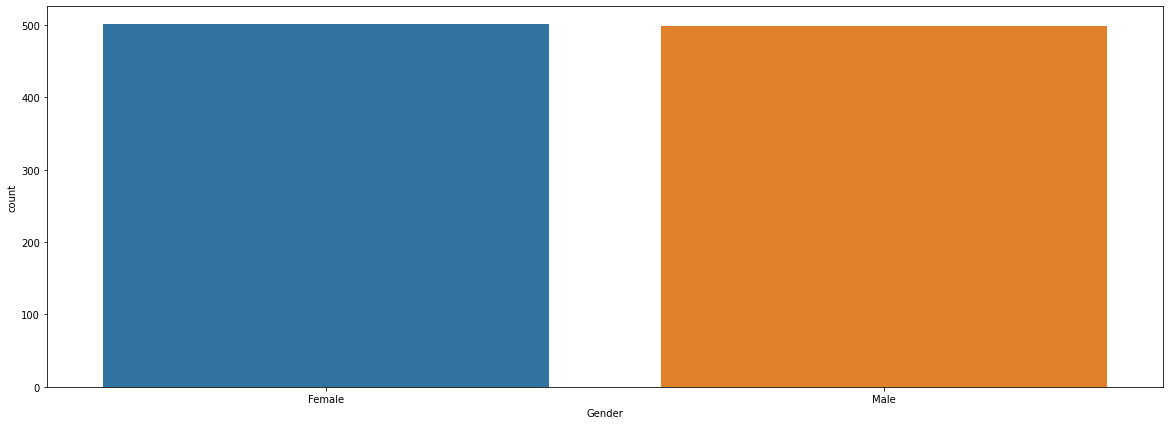

In [8]:
#Male and female Customers
plt.figure(figsize=(20,7))
sns.countplot(df['Gender'])

Text(0.5, 1.0, 'Ratings by Branch')

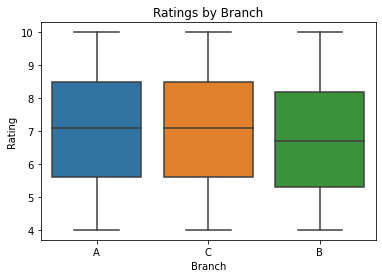

In [9]:
#Ratings of branches of SuperMarket 
sns.boxplot(x="Branch", y = "Rating" ,data =df).set_title("Ratings by Branch")

In [ ]:
#Useful Box plots and you can see that average rating is less in BRANCH B

<AxesSubplot:xlabel='Product line', ylabel='Rating'>

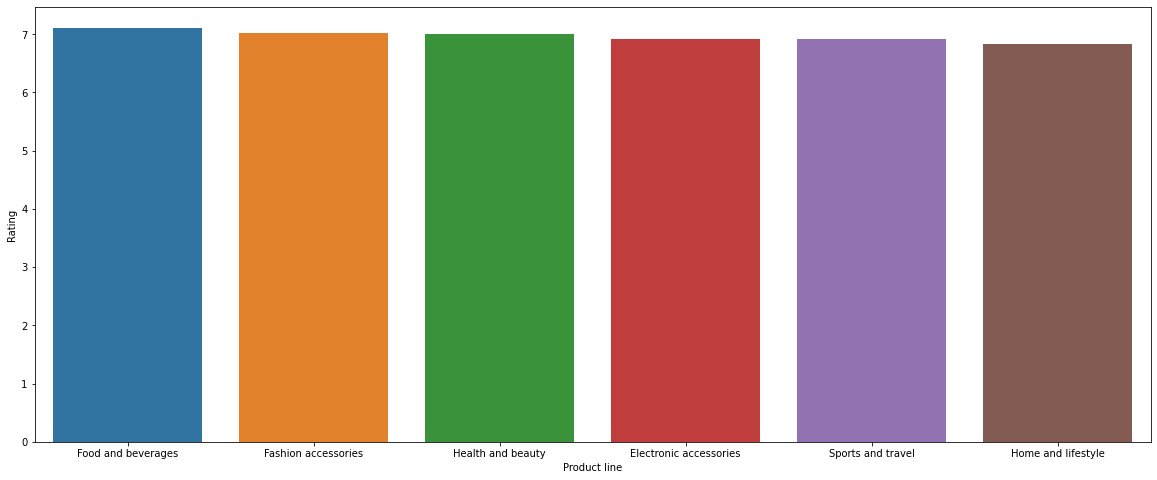

In [10]:
cat=df[["Product line", "Rating"]].groupby(['Product line'], as_index=False).mean().sort_values(by='Rating', ascending=False)
plt.figure(figsize=(20,8))

sns.barplot(x='Product line', y='Rating', data=cat)

In [ ]:
#Negligible variation of rating across product line

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(df['Branch'],df['gross income'])
plt.xlabel('Branch code/ branch name',fontsize='16')
plt.xticks(fontsize='16')
plt.ylabel('Gross income',fontsize='16')
plt.yticks(fontsize='16')
plt.suptitle("Most profittable centre judgement\n",fontsize='20',fontweight='bold')

In [ ]:
# plt.figure(figsize=(20,7))
sns.barplot(df['City'],df['gross income'],palette='Set1')
plt.xlabel('City name',fontsize='16')
plt.xticks(fontsize='16')
plt.ylabel('Gross income',fontsize='16')
plt.yticks(fontsize='16')
plt.suptitle("Most profittable city judgement\n",fontsize='20',fontweight='bold')

Text(0.5, 1.0, 'Payment Mode')

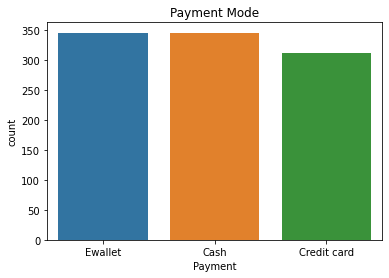

In [13]:
#Payment Analysis(General)
sns.countplot(x="Payment", data =df).set_title("Payment Mode")

Text(0.5, 1.0, 'Payment Channel by Branch')

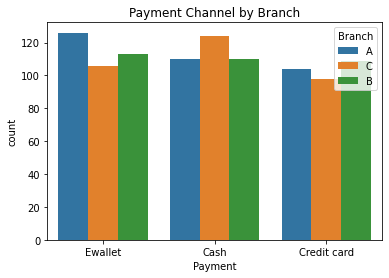

In [3]:
#Payment Method Analysis(Branchwise) 
sns.countplot(x="Payment", hue = "Branch", data =df).set_title("Payment Channel by Branch")

Text(0.5, 1.0, 'Customer Type by Branch')

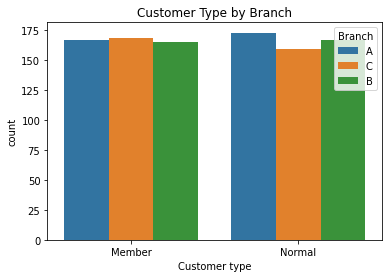

In [4]:
#Customer Analysis
sns.countplot(x="Customer type", hue = "Branch", data =df).set_title("Customer Type by Branch")

In [5]:
#Type of Customers
df.groupby(['Customer type']).agg({'Total': 'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


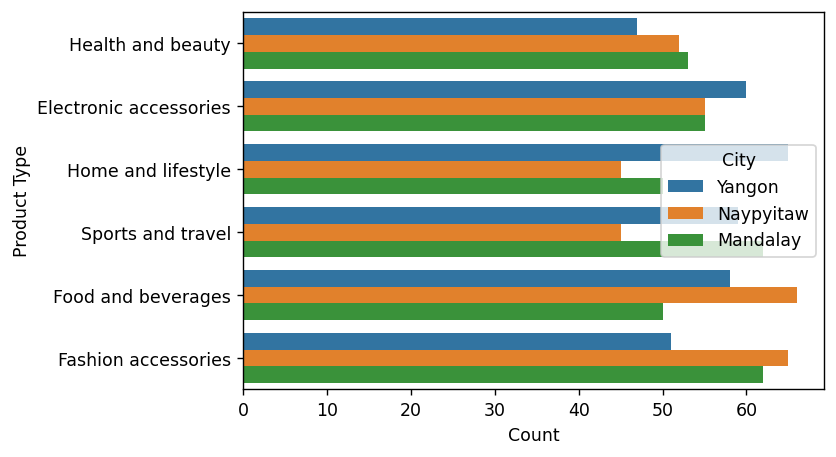

In [6]:
#Product Analysis(by City)
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "City", data = df) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

In [ ]:
#Yangon leads at Home & Lifestyle and Electronic accessories.

#Naypyitaw leads at Food & Bevaerages and Fashion accessories.

#Mandalay leads at Sports & Travel and Health & Beauty.

In [ ]:
Conclusion:
The city chosen for expansion should be Naypyitaw.
Open the store in Naypyitaw with a full-backed inventory of goods in product categories - Food and Beverages, Fashion Assesories and Electronics.
Increase service in cash payment modes